# Pymaceuticals Analysis

## Three main takeaways from analysing the data from this study:

1) Ramicane had the most consistent positive results with respect to total tumor size, with the least amount of calculated variance and standard deviation. Capomulin had very similar results. 
2) The four targeted drugs (Capomulin, Ramicane, Infubinol, Ceftamin) had measurably reliable results, with only one test subject out of bounds form Infubinol. This indicates that the efficacy of each drug regimen in this narrow list is measurably determinant and reliably measurable. 
3) Tumor volumes relative to each mouse's weight for mice on Capomulin were strongly coorelated; larger mice tended to also have larger tumors. 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
study_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
# checking the # of mice?
mouse_count = mouse_metadata.shape[0]
mouse_count


249

In [79]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_df['Mouse ID'].value_counts()



g989    13
w350    10
a401    10
j989    10
y478    10
        ..
u153     1
o848     1
f932     1
b447     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [80]:
study_df.duplicated().sum()

1

In [81]:
clean_study_df = study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [82]:
clean_study_df['Mouse ID'].value_counts()

w350    10
a401    10
c559    10
j989    10
y478    10
        ..
u153     1
o848     1
f932     1
b447     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [83]:
clean_study_df = clean_study_df.drop(clean_study_df[clean_study_df['Mouse ID'] == 'g989'].index)

In [84]:
clean_study_df['Mouse ID'].value_counts()

s508    10
c402    10
j989    10
m650    10
y163    10
        ..
x226     1
b447     1
h428     1
o848     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

# Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean+, median+, variance+, standard deviation+, and SEM+ of the tumor volume. 
avg_tumor_vol = clean_study_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
avg_tumor_vol
median_tumor_vol = clean_study_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
median_tumor_vol
tumor_vol_stan_dev = clean_study_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_vol_variance = clean_study_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_vol_variance
tumor_vol_sem = clean_study_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
tumor_vol_sem

# Assemble the resulting series into a single summary DataFrame.

tumor_summary = pd.DataFrame({"Mean":avg_tumor_vol, "Median" :median_tumor_vol, "Variance": tumor_vol_variance, "Stan Dev": tumor_vol_stan_dev,
                              "SEM": tumor_vol_sem})

tumor_summary

,Mean,Median,Variance,Stan Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


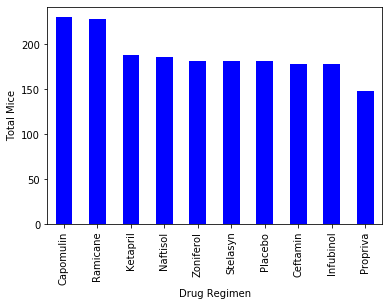

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = clean_study_df['Drug Regimen'].value_counts()
drug_count


bar_chart = drug_count.plot.bar(color='b', align='center')
# drug_count.plot(xlabel="Drug Name", ylabel="Number of Mice")
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.show()



In [87]:
# drug_count.index.values


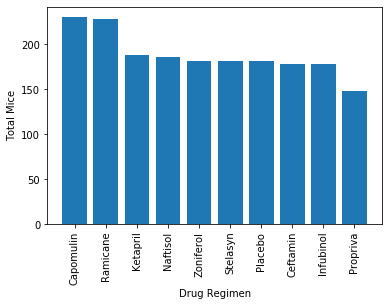

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# total_timepoints = clean_study_df.groupby['Drug Regimen'].sum()['Timepoints']

##
# plt.bar(drug_count, color='r', alpha = 0.25)
plt.bar(drug_count.index.values ,drug_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.show()

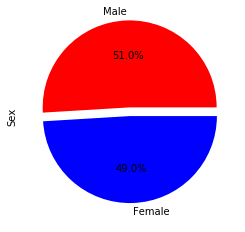

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
mice_gender = clean_study_df['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)


pie = mice_gender.plot.pie(labels=labels, colors=colors, explode=explode, autopct="%1.1f%%")

pie

([<matplotlib.patches.Wedge at 0x7fc30584ce50>,
 [Text(0.03608946990830737, -1.1994571897995099, 'Male'),
  Text(-0.03308201408261496, 1.0995024239828841, 'Female')],
 [Text(0.021052190779845967, -0.6996833607163808, '51.0%'),
  Text(-0.018044734954153614, 0.5997285948997549, '49.0%')])

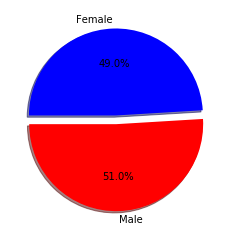

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor

max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_size_df = max_tumor.merge(clean_study_df, on=['Mouse ID', 'Timepoint'], how='left')
last_tumor_size_df

capomulin = last_tumor_size_df[(last_tumor_size_df['Drug Regimen'] == 'Capomulin')]
ramicane = last_tumor_size_df[(last_tumor_size_df['Drug Regimen'] == 'Ramicane')]
infubinol = last_tumor_size_df[(last_tumor_size_df['Drug Regimen'] == 'Infubinol')]
ceftamin = last_tumor_size_df[(last_tumor_size_df['Drug Regimen'] == 'Ceftamin')]

last_tumor_size_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
mouse_tumors = []


for drug in regimen_list:
    drug_name = last_tumor_size_df.loc[last_tumor_size_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    #append tumor list for plotting
    mouse_tumors.append(drug_name)

    # Calculate IQR
    quartiles = drug_name.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #find outliers
    tumor_outliers = drug_name.loc[(drug_name < lower_bound) 
                                            | (drug_name > upper_bound)]
    #print results
    print(f'{drug}, {tumor_outliers}')


Capomulin, Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin, Series([], Name: Tumor Volume (mm3), dtype: float64)


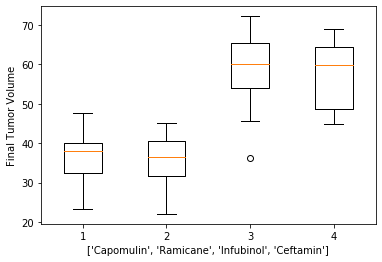

In [93]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel(regimen_list)
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(mouse_tumors)
plt.show()

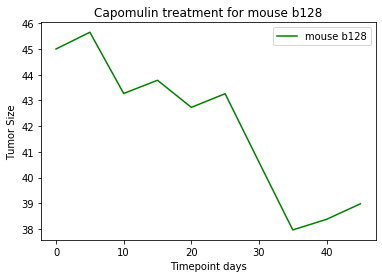

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse = clean_study_df.loc[clean_study_df['Mouse ID'] == 'b128']
single_mouse
single_tumor  = single_mouse['Tumor Volume (mm3)']
single_tumor
single_timepoints = single_mouse['Timepoint']

# # Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(single_timepoints, single_tumor, color="green", label='mouse b128')

# # Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Capomulin treatment for mouse b128")
plt.xlabel("Timepoint days")
plt.ylabel("Tumor Size")

# # Print our chart to the screen
plt.show()

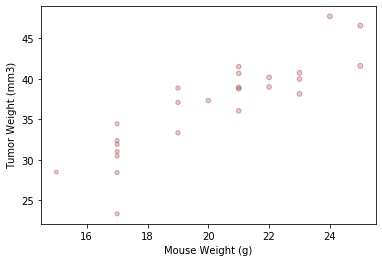

In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = capomulin['Weight (g)'].astype(float)
tumor_weight = capomulin['Tumor Volume (mm3)'].astype(float)

scatter_x_limit = 60
scatter_x_axis = []

scatter_plot = plt.scatter(mouse_weight, tumor_weight, marker="o", facecolors="red", edgecolors="black",
            s=mouse_weight, alpha=0.25)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Weight (mm3)')
plt.show()

The correlation between both factors is 0.88


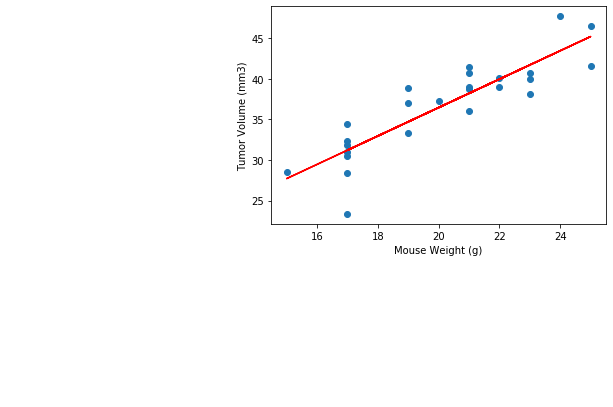

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,tumor_weight)
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, tumor_weight)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_weight)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
